In [3]:
import keras.optimizers
import tensorflow as tf
import numpy as np

In [4]:
height = tf.constant(np.array([1.4, 2., 3, 3.8]), dtype=tf.float32)
weight = tf.constant(np.array([0.8, 1.7, 1.6, 1.9]), dtype=tf.float32)

In [18]:
print(height.shape)
print(weight.shape)

(4,)
(4,)


In [12]:
from keras.layers import Dense
from keras.models import Sequential
import keras

In [24]:
model = Sequential([
    Dense(1, input_shape=(1, ))
])

model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=1e-2),
    loss='mse',
    metrics=['mae']
)

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(
    height,
    weight,
    epochs=20
)

Epoch 1/20
1/1 [==============================] - 0s 173ms/step - loss: 2.1717 - mae: 1.2888
Epoch 2/20
1/1 [==============================] - 0s 4ms/step - loss: 1.5515 - mae: 1.0640
Epoch 3/20
1/1 [==============================] - 0s 4ms/step - loss: 1.1190 - mae: 0.8762
Epoch 4/20
1/1 [==============================] - 0s 4ms/step - loss: 0.8173 - mae: 0.7195
Epoch 5/20
1/1 [==============================] - 0s 5ms/step - loss: 0.6068 - mae: 0.6281
Epoch 6/20
1/1 [==============================] - 0s 4ms/step - loss: 0.4600 - mae: 0.5629
Epoch 7/20
1/1 [==============================] - 0s 5ms/step - loss: 0.3576 - mae: 0.5085
Epoch 8/20
1/1 [==============================] - 0s 5ms/step - loss: 0.2860 - mae: 0.4631
Epoch 9/20
1/1 [==============================] - 0s 4ms/step - loss: 0.2361 - mae: 0.4251
Epoch 10/20
1/1 [==============================] - 0s 6ms/step - loss: 0.2012 - mae: 0.3934
Epoch 11/20
1/1 [==============================] - 0s 5ms/step - loss: 0.1768 - mae: 0.

tf.Tensor([0.8  1.44 2.08 2.72 3.36 4.  ], shape=(6,), dtype=float32)
1/1 [==============================] - 0s 62ms/step
[[0.36939588]
 [0.7700108 ]
 [1.1706257 ]
 [1.5712407 ]
 [1.9718554 ]
 [2.3724704 ]]
1/1 [==============================] - 0s 40ms/step


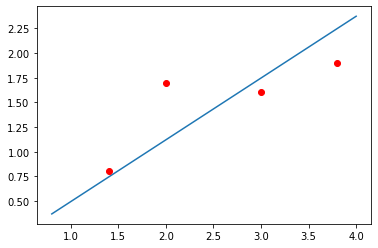

In [26]:
from matplotlib import pyplot as plt
h1 = tf.constant(np.linspace(0.8, 4, 6), dtype=tf.float32)
print(h1)
print(model.predict(h1))
plt.plot(
    h1.numpy().flatten(),
    model.predict(h1),
)

plt.plot(height, weight, 'o', color='red')

In [137]:
W1 = tf.Variable(initial_value=np.random.normal(), dtype=tf.float32)
B = tf.Variable(initial_value=np.random.normal(), dtype=tf.float32)

print(f'W1: {W1.numpy():0.4f}, b: {B.numpy():0.4f}')
def predict_weight(h, w1, b):
    return h * w1 + b

def loss(y_pred, y_true):
    return tf.reduce_sum(tf.square(y_pred-y_true))


W1: -0.9242, b: -0.4761


In [138]:

def train(x_val, y_val, lr):
    global W1
    global B
    with tf.GradientTape() as tape:
        current_loss = loss(predict_weight(x_val, W1, B), y_val)

    da, db = tape.gradient(current_loss, [W1, B])
    W1.assign_sub(da * lr)
    B.assign_sub(db * lr)


In [139]:
for i in range(500):
    current_loss = loss(predict_weight(height, W1, B), weight)
    print(f'Epoch: {i}')
    print(f'W1: {W1.numpy():0.4f}, b: {B.numpy():0.4f}, Loss: {current_loss:0.4f}')

    train(height, weight, 0.01)

Epoch: 0
W1: -0.9242, b: -0.4761, Loss: 80.9817
Epoch: 1
W1: 0.0472, b: -0.1295, Loss: 9.7019
Epoch: 2
W1: 0.3766, b: -0.0088, Loss: 1.4494
Epoch: 3
W1: 0.4878, b: 0.0351, Loss: 0.4924
Epoch: 4
W1: 0.5246, b: 0.0528, Loss: 0.3799
Epoch: 5
W1: 0.5362, b: 0.0616, Loss: 0.3651
Epoch: 6
W1: 0.5391, b: 0.0672, Loss: 0.3617
Epoch: 7
W1: 0.5392, b: 0.0719, Loss: 0.3597
Epoch: 8
W1: 0.5383, b: 0.0761, Loss: 0.3578
Epoch: 9
W1: 0.5370, b: 0.0802, Loss: 0.3560
Epoch: 10
W1: 0.5357, b: 0.0843, Loss: 0.3542
Epoch: 11
W1: 0.5343, b: 0.0882, Loss: 0.3524
Epoch: 12
W1: 0.5329, b: 0.0922, Loss: 0.3507
Epoch: 13
W1: 0.5316, b: 0.0961, Loss: 0.3490
Epoch: 14
W1: 0.5302, b: 0.1000, Loss: 0.3473
Epoch: 15
W1: 0.5289, b: 0.1038, Loss: 0.3457
Epoch: 16
W1: 0.5275, b: 0.1076, Loss: 0.3440
Epoch: 17
W1: 0.5262, b: 0.1114, Loss: 0.3424
Epoch: 18
W1: 0.5249, b: 0.1151, Loss: 0.3409
Epoch: 19
W1: 0.5236, b: 0.1189, Loss: 0.3393
Epoch: 20
W1: 0.5223, b: 0.1225, Loss: 0.3378
Epoch: 21
W1: 0.5210, b: 0.1262, Loss: 

tf.Tensor([0.8  1.44 2.08 2.72 3.36 4.  ], shape=(6,), dtype=float32)
tf.Tensor([0.85380495 1.0898099  1.3258147  1.5618196  1.7978244  2.0338295 ], shape=(6,), dtype=float32)


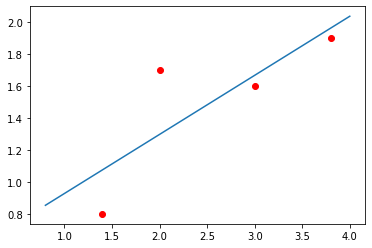

In [140]:
h1 = tf.constant(np.linspace(0.8, 4, 6), dtype=tf.float32)
print(h1)
print(predict_weight(h1, W1, B))
plt.plot(
    h1.numpy().flatten(),
    predict_weight(h1, W1, B),
)

plt.plot(height, weight, 'o', color='red')